In [5]:
import pandas as pd

In [6]:
def load_data(path="../data/csv/all.csv"):
    dataframe = pd.read_csv(path, index_col=0)
    return dataframe.loc[~dataframe["execTimeMs"].isnull()]

In [7]:
df = load_data()

In [4]:
df.head()

,jobId,read_sum,write_sum,readSyscalls_sum,writeSyscalls_sum,readReal_sum,writeReal_sum,writeCancelled_sum,rxBytes_sum,rxPackets_sum,...,mem.used,mem.active,mem.available,mem.buffers,mem.cached,mem.slab,mem.buffcache,mem.swaptotal,mem.swapused,mem.swapfree
0,-8Ip2oamm-1-10,1.640063e+07,1865.0,20775.0,37.0,3.399680e+05,69632.0,0.0,0.0,0.0,...,3326259200,941318144,7053393920,2768896,2302001152,590626816,2895396864,0,0,0
1,-8Ip2oamm-1-11,3.943547e+09,99029.0,863138.0,1382.0,2.988442e+09,4825088.0,0.0,506728.0,1192.0,...,3656019968,1019281408,7034150912,2768896,2545008640,594448384,3142225920,0,0,0
2,-8Ip2oamm-1-12,2.260023e+09,63886.0,561366.0,906.0,1.886495e+09,2158592.0,0.0,341954.0,803.0,...,3795075072,995864576,7057567744,2768896,2772025344,480731136,3255525376,0,0,0
3,-8Ip2oamm-1-13,2.284814e+09,147790.0,582911.0,29318.0,4.472832e+06,3805184.0,0.0,354552.0,832.0,...,4242853888,1047011328,6947700736,2768896,3209531392,467460096,3679760384,0,0,0
4,-8Ip2oamm-1-14,2.754452e+09,70983.0,628488.0,986.0,2.200519e+09,3858432.0,0.0,380100.0,894.0,...,3600007168,966131712,7087300608,2768896,2544816128,590618624,3138203648,0,0,0


In [12]:
df.columns

Index(['jobId', 'read_sum', 'write_sum', 'readSyscalls_sum',
       'writeSyscalls_sum', 'readReal_sum', 'writeReal_sum',
       'writeCancelled_sum', 'rxBytes_sum', 'rxPackets_sum', 'rxErrors_sum',
       'rxDrop_sum', 'rxFifo_sum', 'rxFrame_sum', 'rxCompressed_sum',
       'rxMulticast_sum', 'txBytes_sum', 'txPackets_sum', 'txErrors_sum',
       'txDrop_sum', 'txFifo_sum', 'txColls_sum', 'txCarrier_sum',
       'txCompressed_sum', 'cpu_mean', 'cpu_max', 'memory_mean', 'memory_max',
       'ctime_mean', 'ctime_max', 'ctime_sum', 'workflowName', 'size',
       'executable', 'args', 'inputs', 'outputs', 'name', 'command',
       'execTimeMs', 'cpu.manufacturer', 'cpu.brand', 'cpu.vendor',
       'cpu.family', 'cpu.model', 'cpu.stepping', 'cpu.speed', 'cpu.cores',
       'cpu.physicalCores', 'cpu.processors', 'cpu.cache.l1d', 'cpu.cache.l1i',
       'cpu.cache.l2', 'cpu.cache.l3', 'mem.total', 'mem.free', 'mem.used',
       'mem.active', 'mem.available', 'mem.buffers', 'mem.cached', 'mem

In [13]:
def normalize_column(column):
    minvalue, maxvalue = column.min(), column.max()
    return (column - minvalue) / (maxvalue - minvalue)

def vectorize_textual(column):
    return pd.get_dummies(column)

df.select_dtypes(include='object')
df.ctime_max.mean(), df.execTimeMs.mean()

(11000.027609293515, 12287.035978192425)

## I co dalej
Było
- workflow
- size
- inputs
- outputs
- name
- cpu manufacturer
- cpu brand
- cpu speed
- cpu cores
- cpu physical cores
- mem_total
- mem_active

Wynikowo:
- memory_max <- czy memory intensive
- execTimeMs <- czy cpu intensive
- read_sum <- czy read intensive
- write_sum <- czy write intensive

Czyli - wektoryzujemy wszystko oprócz memory_max, execTimeMs, read_sum i write_sum

In [14]:
df.select_dtypes(exclude='object').dtypes

read_sum              float64
write_sum             float64
readSyscalls_sum      float64
writeSyscalls_sum     float64
readReal_sum          float64
writeReal_sum         float64
writeCancelled_sum    float64
rxBytes_sum           float64
rxPackets_sum         float64
rxErrors_sum          float64
rxDrop_sum            float64
rxFifo_sum            float64
rxFrame_sum           float64
rxCompressed_sum      float64
rxMulticast_sum       float64
txBytes_sum           float64
txPackets_sum         float64
txErrors_sum          float64
txDrop_sum            float64
txFifo_sum            float64
txColls_sum           float64
txCarrier_sum         float64
txCompressed_sum      float64
cpu_mean              float64
cpu_max               float64
memory_mean           float64
memory_max            float64
ctime_mean            float64
ctime_max             float64
ctime_sum             float64
size                  float64
execTimeMs            float64
cpu.family            float64
cpu.model 

In [15]:
import numpy as np

In [17]:
def results_frame(dataframe):
    results = dataframe.filter(['execTimeMs', 'cpu_mean', 'read_sum', 'write_sum', 'memory_max'])
    return results

def features_frame(dataframe):
    filtered = dataframe.filter(['workflowName', 'size', 'executable', 'args', 'inputs', 'outputs', 'name', 'cpu.manufacturer', 'cpu.brand', 'cpu.vendor',
                               'cpu.family', 'cpu.model', 'cpu.stepping', 'cpu.speed', 'cpu.cores', 'cpu.physicalCores', 'cpu.processors', 'cpu.cache.l1d', 
                               'cpu.cache.l1i', 'cpu.cache.l2', 'cpu.cache.l3', 'mem.total', 'mem.free', 'mem.used', 'mem.active', 'mem.available', 'mem.buffers', 
                               'mem.cached', 'mem.slab', 'mem.buffcache', 'mem.swaptotal', 'mem.swapused', 'mem.swapfree'])
    dataframe = drop_null_columns(filtered)
    vectorize_list_columns(dataframe, ['args', 'inputs', 'outputs'])
    dataframe = drop_boring_columns(dataframe)    
    
    
    numerical_columns = dataframe.select_dtypes(include='number').columns  
    vectorize_numerical_columns(dataframe, numerical_columns)
    
    textual_columns = dataframe.select_dtypes(include="object").columns
    dataframe = vectorize_textual_columns(dataframe, textual_columns)
    return dataframe
    
def drop_null_columns(dataframe):
    null_columns = get_columns_with_nulls(dataframe)
    return dataframe.drop(null_columns, axis=1)

def drop_boring_columns(dataframe):
    boring_columns = get_non_variable_columns(dataframe)
    return dataframe.drop(boring_columns, axis=1)
    
def vectorize_list_columns(dataframe, columns):
    for column in columns:
        dataframe[column] = vectorize_list(dataframe[column])
        
def vectorize_numerical_columns(dataframe, columns):
    for column in columns:
        dataframe[column] = normalize_column(dataframe[column])
        
def vectorize_textual_columns(dataframe, columns):
    encoded = [pd.get_dummies(dataframe[column], prefix=column) for column in columns]    
    return pd.concat([dataframe.drop(columns, axis=1), *encoded], axis=1)

def vectorize_categorical_columns(dataframe, columns, categories):
    for column in columns:
        dataframe[column] = pd.Categorical(dataframe[column], categories)
    return vectorize_textual_columns(dataframe, columns)
    
def vectorize_list(series):
    def vectorize(list_string):
        return len(eval(list_string))
    return series.apply(vectorize)
    
def get_columns_with_nulls(dataframe):
    columns = list(dataframe.columns)
    return [column for column in columns if dataframe[column].isnull().values.any()]

def get_non_variable_columns(dataframe):
    columns = list(dataframe.columns)
    return [column for column in columns if dataframe[column].unique().size == 1]

In [18]:
test_df = df
features_df = features_frame(test_df)
results_df = results_frame(test_df)

In [19]:
features_df.columns

Index(['size', 'args', 'inputs', 'outputs', 'cpu.speed', 'cpu.cores',
       'cpu.physicalCores', 'mem.total', 'mem.free', 'mem.used', 'mem.active',
       'mem.available', 'mem.buffers', 'mem.cached', 'mem.slab',
       'mem.buffcache', 'workflowName_montage', 'workflowName_montage2',
       'workflowName_soykb', 'executable_bwa-wrapper',
       'executable_gatk-wrapper', 'executable_mAdd', 'executable_mBackground',
       'executable_mBgModel', 'executable_mConcatFit', 'executable_mDiffFit',
       'executable_mImgtbl', 'executable_mJPEG', 'executable_mProject',
       'executable_mProjectPP', 'executable_mShrink', 'executable_mViewer',
       'executable_picard-wrapper', 'executable_samtools-wrapper',
       'name_add_replace', 'name_alignment_to_reference', 'name_bwa-index',
       'name_combine_variants', 'name_dedup', 'name_faidx',
       'name_filtering_indel', 'name_filtering_snp', 'name_genotype_gvcfs',
       'name_haplotype_caller', 'name_indel_realign', 'name_mAdd',
       

In [20]:
from scipy.stats import percentileofscore

In [21]:
def calculate_quantile_rank(labels, label):
    return percentileofscore(labels, label) / 100

def calculate_utilization_class(labels, label):
    def label_for_rank(rank):
        if rank > 0.75:
            return 'very high'
        elif rank > 0.5:
            return 'high'
        elif rank > 0.25:
            return 'medium'
        else:
            return 'low'
    return label_for_rank(calculate_quantile_rank(labels, label))

In [22]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [ ]:
cpu_means = results_df['cpu_mean']

X = features_df
y = cpu_means.map(lambda value: calculate_utilization_class(cpu_means, value))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 70% training and 30% test

In [23]:
def perform_classification_trial(classifier, X_train, y_train, X_test, y_test, classifier_name):
    print(f"Evaluating classifier '{classifier_name}'")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"{classifier_name} has accuracy of {metrics.accuracy_score(y_test, y_pred)}")
    return y_pred

In [ ]:
perform_classification_trial(DecisionTreeClassifier(), X_train, y_train, X_test, y_test, "Decision tree classifier")

In [ ]:
cpu_means = results_df['cpu_mean']

X = features_df
y = cpu_means.map(lambda value: calculate_quantile_rank(cpu_means, value))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 70% training and 30% test

In [24]:
def perform_regression_trial(regressor, X_train, y_train, X_test, y_test, regressor_name):
    print(f"Evaluating regressor '{regressor_name}'")
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(f"{regressor_name} accuracy:\n\tMAE: {metrics.mean_absolute_error(y_test, y_pred)}")

In [ ]:
# perform_regression_trial(DecisionTreeRegressor(random_state = 0), X_train, y_train, X_test, y_test, 'Decision tree regressor')
# perform_regression_trial(KNeighborsRegressor(), X_train, y_train, X_test, y_test, 'KNN regressor')
# perform_regression_trial(RandomForestRegressor(random_state = 0, n_estimators=20), X_train, y_train, X_test, y_test, 'Random forest regressor')
# perform_regression_trial(MLPRegressor(random_state = 0), X_train, y_train, X_test, y_test, 'NN regressor')
# perform_regression_trial(GradientBoostingRegressor(random_state = 0), X_train, y_train, X_test, y_test, 'Gradient Boosting regressor')

In [25]:
def benchmark_parameter_classification(features, labels, column_label):
    print(f"Benchmarking classifier for {column_label}")
    classifiers = [
#         DecisionTreeClassifier(),
        KNeighborsClassifier(),
#         MLPClassifier(),
#         RandomForestClassifier()
    ]
    labels = labels[column_label]
    labels = labels.map(lambda value: calculate_utilization_class(labels, value))
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=1) 
    for classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        print(f"{str(classifier)} has accuracy of {metrics.accuracy_score(y_test, y_pred)}")

In [ ]:
for label in ['cpu_mean', 'read_sum', 'write_sum', 'memory_max']:
    benchmark_parameter_classification(features_df, results_df, label)

# Here goes some IWIUM evaluation


### Podział danych

In [26]:
def save_interesting_datasets(dataframe):
    jobs_below_1200ms = dataframe.loc[dataframe["execTimeMs"] < 1200]
    jobs_between_2000ms_25000ms = dataframe.loc[dataframe["execTimeMs"].between(2000, 25000)]
    jobs_count = dataframe["name"].value_counts()
    jobs_most_occuring = dataframe.loc[dataframe["name"].isin(jobs_count[jobs_count > 3000].index.values)]
    jobs_mDiffFit = dataframe.loc[dataframe["name"] == "mDiffFit"]
    jobs_haplotype = dataframe.loc[dataframe["name"] == "haplotype_caller"]
    jobs_mShrink = dataframe.loc[dataframe["name"] == "mShrink"]
    return jobs_below_1200ms, jobs_between_2000ms_25000ms, jobs_most_occuring, dataframe, jobs_mDiffFit, jobs_haplotype, jobs_mShrink

In [27]:
datasets = save_interesting_datasets(df)
[len(ds) for ds in datasets]

[137871, 25168, 178762, 185807, 109575, 9739, 119]

### Generowanie danych wejściowych do GPT-2

In [28]:
import numpy as np

def generate_inputs_for_textual_models(dataframe, round_results=False):
    results = results_frame(dataframe)
    rows_done = 0
    
    def enhance_result(result_time_ms):
        return int(round(np.nan_to_num(result_time_ms), -2)) if round_results else result_time_ms
    
    def utilization(resource_type, row_value, textual=True):
        if textual:
            return calculate_utilization_class(results[resource_type], row_value)
        else:
            return calculate_quantile_rank(results[resource_type], row_value)
    
    def make_string(row):
        row_string = f"{row.workflowName} size {row.size} inputs {len(eval(row.inputs))}outputs {len(eval(row.outputs))} name {row.name} manufacturer {row['cpu.manufacturer']} brand {row['cpu.brand']} speed {row['cpu.speed']} cores {row['cpu.cores']} physicalCores {row['cpu.physicalCores']} memoryTotal {row['mem.total']} memoryActive {row['mem.active']} cpuIntensive {utilization('cpu_mean', row.cpu_mean)} readIntensive {utilization('read_sum', row.read_sum)} writeIntensive {utilization('write_sum', row.write_sum)} memoryIntensive {utilization('memory_max', row.memory_max)}  \n{enhance_result(row.execTimeMs)} "
        nonlocal rows_done
        rows_done += 1
        if rows_done % 10000 == 0:
            print(f"Done {rows_done} out of {len(dataframe)}")
        return row_string.replace("®", "")
    return dataframe.apply(make_string, axis=1)

In [20]:
textuals = generate_inputs_for_textual_models(df[:100], round_results=True)
textuals[0]

'soykb size 66 inputs 12outputs 2 name 0 manufacturer Intel brand Xeon Platinum 8124M speed 3.0 cores 4 physicalCores 2 memoryTotal 7994712064 memoryActive 941318144 cpuIntensive medium readIntensive medium writeIntensive high memoryIntensive very high  \n2500 '

### Optymalizacja hiperparametrów

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score

In [22]:
def optimize_hypers(parameter, features, labels, regression=True):
    print(f"Optimizing for {parameter}")
    labels = labels[parameter]
    labels = labels.map(lambda value: calculate_quantile_rank(labels, value))
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=0)
    classifiers = [
        (
            DecisionTreeRegressor(),
            {
                "criterion": ["mse", "friedman_mse", "mae"]
            }
        ), (
            KNeighborsRegressor(),
            {
                "n_neighbors": [5, 10, 15, 25],
                "leaf_size": [5, 15, 30]
            }
        ), (
            MLPRegressor(),
            {
                "hidden_layer_sizes": [(20,), (50,), (100,)],
                "activation": ["logistic", "tanh", "relu"],
            }
        ), (
            RandomForestRegressor(),
            {
                "n_estimators": [10, 20, 50],
                "criterion": ["mae", "mse"]
            }
        )
    ]
    scoring = "neg_root_mean_squared_error"
    
    for classifier, params in classifiers:
        print(f"Optimizing for {classifier}")
        clf = GridSearchCV(classifier, params, scoring, n_jobs=-1, verbose=2, cv=2)
        clf.fit(X_train, y_train)
        
        print(f"Best parameters for {classifier} are {clf.best_params_}")
        y_true, y_pred = y_test, clf.predict(X_test)
        print(f"Errors: MSLE {mean_absolute_error(y_true, y_pred)}")
        print("\n")

In [ ]:
features = features_frame(datasets[1])
results = results_frame(datasets[1])

for parameter in ['cpu_mean', 'read_sum', 'write_sum', 'memory_max']:
    optimize_hypers(parameter, features, results)

In [ ]:
features = features_frame(custom_df)
results = results_frame(custom_df)

In [ ]:
for parameter in ['cpu_mean', 'read_sum', 'write_sum', 'memory_max']:
    optimize_hypers(parameter, features, results)

In [8]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [69]:
def predict_e2e_single_step(X_train, X_test, y_train, y_test, regressor):
    y_train = y_train.execTimeMs
    y_test = y_test.execTimeMs
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(f"{regressor} accuracy:\n\tMAE: {metrics.mean_absolute_error(y_test, y_pred)}\n\tMAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
    return f"single {regressor} {metrics.mean_absolute_error(y_test, y_pred)} {mean_absolute_percentage_error(y_test, y_pred)}"

In [68]:
# regressor = RandomForestRegressor(n_estimators=20, criterion="mae", n_jobs=-1, random_state=0)
# regressor = KNeighborsRegressor(n_neighbors=5, leaf_size=15)

In [26]:
predict_e2e_single_step(df[:1000], regressor)

KNeighborsRegressor(leaf_size=15) accuracy:
	MAE: 649.7416


In [123]:
import sklearn
print(sklearn.__version__)

0.23.2


In [30]:
def perform_regression_trial(regressor, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(f"{regressor} accuracy:\n\tMAE: {metrics.mean_absolute_error(y_test, y_pred)}")
    return y_pred

In [31]:
def y_to_normalized(y):
    return y.map(lambda value: calculate_quantile_rank(y, value))

In [66]:
def predict_e2e_two_steps(X_train, X_test, y_train, y_test, cpu_regressor, read_regressor, write_regressor, memory_regressor, time_regressor):
#     print("training cpu")
    cpu_regressor.fit(X_train, y_to_normalized(y_train["cpu_mean"]))
    
#     print("training io read")
    read_regressor.fit(X_train, y_to_normalized(y_train["read_sum"]))
    
#     print("training io write")
    write_regressor.fit(X_train, y_to_normalized(y_train["write_sum"]))
    
#     print("training memory max")
    memory_regressor.fit(X_train, y_to_normalized(y_train["memory_max"]))
    
#     print("Predicting")
    cpu_predicted = cpu_regressor.predict(X_test)
    read_predicted = read_regressor.predict(X_test)
    write_predicted = write_regressor.predict(X_test)
    memory_predicted = memory_regressor.predict(X_test)
    
#     print("Building final test")
    X_test.loc[:, "cpu_mean"] = cpu_predicted
    X_test.loc[:, "read_sum"] = read_predicted
    X_test.loc[:, "write_sum"] = write_predicted
    X_test.loc[:, "memory_max"] = memory_predicted
    
    X_train.loc[:, "cpu_mean"] = y_to_normalized(y_train["cpu_mean"])
    X_train.loc[:, "read_sum"] = y_to_normalized(y_train["read_sum"])
    X_train.loc[:, "write_sum"] = y_to_normalized(y_train["write_sum"])
    X_train.loc[:, "memory_max"] = y_to_normalized(y_train["memory_max"])    
    
#     print("Training second step")
    time_regressor.fit(X_train, y_train["execTimeMs"])
    
    y_pred = time_regressor.predict(X_test)
    
    print(f"Multi accuracy:\n\tMAE: {metrics.mean_absolute_error(y_test['execTimeMs'], y_pred)}\n\tMAPE: {mean_absolute_percentage_error(y_test['execTimeMs'], y_pred)}")
    return f"multi {time_regressor} {metrics.mean_absolute_error(y_test['execTimeMs'], y_pred)} {mean_absolute_percentage_error(y_test['execTimeMs'], y_pred)}" 

# TO CO WYŻEJ, tylko z klasyfikacją na kategorie jobów

In [53]:
# rf = lambda: RandomForestRegressor(n_estimators=20, criterion="mae", n_jobs=-1, random_state=0)
# rf = lambda: KNeighborsRegressor(n_neighbors=5, leaf_size=15)
make_knn = lambda: KNeighborsRegressor(leaf_size=10)

In [37]:
def y_to_labelled(y):
    return y.map(lambda value: calculate_utilization_class(y, value))

In [67]:
def predict_e2e_two_steps_classifiers(X_train, X_test, y_train, y_test, cpu_classifier, read_classifier, write_classifier, memory_classifier, time_regressor):
    
#     print("training cpu")
    cpu_classifier.fit(X_train, y_to_labelled(y_train["cpu_mean"]))
#     print("training read")
    read_classifier.fit(X_train, y_to_labelled(y_train["read_sum"]))
#     print("training write")
    write_classifier.fit(X_train, y_to_labelled(y_train["write_sum"]))
#     print("training memory")
    memory_classifier.fit(X_train, y_to_labelled(y_train["memory_max"]))
    
    cpu_predicted = cpu_classifier.predict(X_test)
    read_predicted = read_classifier.predict(X_test)
    write_predicted = write_classifier.predict(X_test)
    memory_predicted = memory_classifier.predict(X_test)

    X_test.loc[:, "cpu_mean"] = cpu_predicted
    X_test.loc[:, "read_sum"] = read_predicted
    X_test.loc[:, "write_sum"] = write_predicted
    X_test.loc[:, "memory_max"] = memory_predicted
    X_test = vectorize_categorical_columns(X_test, ["cpu_mean", "read_sum", "write_sum", "memory_max"], ["low", "medium", "high", "very high"])
    
    X_train.loc[:, "cpu_mean"] = y_to_labelled(y_train["cpu_mean"])
    X_train.loc[:, "read_sum"] = y_to_labelled(y_train["read_sum"])
    X_train.loc[:, "write_sum"] = y_to_labelled(y_train["write_sum"])
    X_train.loc[:, "memory_max"] = y_to_labelled(y_train["memory_max"])  
    X_train = vectorize_categorical_columns(X_train, ["cpu_mean", "read_sum", "write_sum", "memory_max"], ["low", "medium", "high", "very high"])
    time_regressor.fit(X_train, y_train["execTimeMs"])
    y_pred = time_regressor.predict(X_test)
    print(f"Multi w clf accuracy:\n\tMAE: {metrics.mean_absolute_error(y_test['execTimeMs'], y_pred)}\n\tMAPE: {mean_absolute_percentage_error(y_test['execTimeMs'], y_pred)}")
    return f"multi {time_regressor} {metrics.mean_absolute_error(y_test['execTimeMs'], y_pred)} {mean_absolute_percentage_error(y_test['execTimeMs'], y_pred)}" 

In [34]:
knn_clf = lambda: KNeighborsClassifier(leaf_size=10)

In [ ]:
predict_e2e_two_steps_classifiers(datasets[1], knn_clf(), knn_clf(), knn_clf(), knn_clf(), make_knn()), predict_e2e_two_steps(datasets[1], make_knn(), make_knn(), make_knn(), make_knn(), make_knn())

In [ ]:
predict_e2e_two_steps_classifiers(datasets[0], knn_clf(), knn_clf(), knn_clf(), knn_clf(), make_knn())

In [71]:
results = []
for ds in datasets:
    print(f"Preparing frames for ds of len {len(ds)}")
    features = features_frame(ds)
    labels = results_frame(ds)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state = 0)
    print("Predicting...")
    results += [(
        predict_e2e_single_step(X_train, X_test, y_train, y_test, make_knn()),
        predict_e2e_two_steps(X_train, X_test, y_train, y_test, make_knn(), make_knn(), make_knn(), make_knn(), make_knn()),
        predict_e2e_two_steps_classifiers(X_train, X_test, y_train, y_test, knn_clf(), knn_clf(), knn_clf(), knn_clf(), make_knn())
    )]

Preparing frames for ds of len 137871
Predicting...
KNeighborsRegressor(leaf_size=10) accuracy:
	MAE: 76.35319716838806
	MAPE: 33.79918044171428


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Multi accuracy:
	MAE: 74.82117906463968
	MAPE: 28.30719696698279


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-17-e7af59665b09>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = pd.Categorical(dataframe[column], categories)


Multi w clf accuracy:
	MAE: 73.98320181037484
	MAPE: 27.864130318885188
Preparing frames for ds of len 25168
Predicting...
KNeighborsRegressor(leaf_size=10) accuracy:
	MAE: 2053.971074380165
	MAPE: 24.814391356832978


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Multi accuracy:
	MAE: 2414.6305467260013
	MAPE: 34.46485969529597


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-17-e7af59665b09>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = pd.Categorical(dataframe[column], categories)


Multi w clf accuracy:
	MAE: 2249.4555308328036
	MAPE: 28.08926925797192
Preparing frames for ds of len 178762
Predicting...
KNeighborsRegressor(leaf_size=10) accuracy:
	MAE: 1012.8768029357141
	MAPE: 36.66892803268886


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Multi accuracy:
	MAE: 1073.9229822559353
	MAPE: 31.97459528023717


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-17-e7af59665b09>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = pd.Categorical(dataframe[column], categories)


Multi w clf accuracy:
	MAE: 1073.448139446421
	MAPE: 34.120600757001704
Preparing frames for ds of len 185807
Predicting...
KNeighborsRegressor(leaf_size=10) accuracy:
	MAE: 3206.610277275467
	MAPE: 37.50530417716891


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Multi accuracy:
	MAE: 3272.335886506502
	MAPE: 32.91997062881366


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-17-e7af59665b09>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = pd.Categorical(dataframe[column], categories)


Multi w clf accuracy:
	MAE: 3297.031047102385
	MAPE: 33.42827423979192
Preparing frames for ds of len 109575
Predicting...
KNeighborsRegressor(leaf_size=10) accuracy:
	MAE: 387.5845732642184
	MAPE: 53.86323304010311


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Multi accuracy:
	MAE: 452.3921953712492
	MAPE: 40.32501338008514


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-17-e7af59665b09>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = pd.Categorical(dataframe[column], categories)


Multi w clf accuracy:
	MAE: 432.23718332481565
	MAPE: 41.554085506236184
Preparing frames for ds of len 9739
Predicting...
KNeighborsRegressor(leaf_size=10) accuracy:
	MAE: 6715.394250513347
	MAPE: 12.769996087420843


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Multi accuracy:
	MAE: 6437.324681724846
	MAPE: 12.150230908978644


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-17-e7af59665b09>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = pd.Categorical(dataframe[column], categories)


Multi w clf accuracy:
	MAE: 6501.03318275154
	MAPE: 12.265058739306447
Preparing frames for ds of len 119
Predicting...
KNeighborsRegressor(leaf_size=10) accuracy:
	MAE: 858.6399999999999
	MAPE: 79.03181148067266
Multi accuracy:
	MAE: 869.9866666666665
	MAPE: 79.18961010539213
Multi w clf accuracy:
	MAE: 905.2333333333331
	MAPE: 57.85142793032016


/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/mikegpl/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Podsumowując:

- pomierzyć dla datasetu wyłącznie z jobów jednego typu - 3 typy
- wykresy (bar charty)
y: MAE
x: dataset x method (ds1 [single, multi, multicf]
- matryca pearsona - wykresik
- histogram długości jobów
- dla każdego datasetu histogram klasyfikacyjny cpu_mean/read_sum/itd.

In [72]:
results

[('single KNeighborsRegressor(leaf_size=10) 76.35319716838806 33.79918044171428',
  'multi KNeighborsRegressor(leaf_size=10) 74.82117906463968 28.30719696698279',
  'multi KNeighborsRegressor(leaf_size=10) 73.98320181037484 27.864130318885188'),
 ('single KNeighborsRegressor(leaf_size=10) 2053.971074380165 24.814391356832978',
  'multi KNeighborsRegressor(leaf_size=10) 2414.6305467260013 34.46485969529597',
  'multi KNeighborsRegressor(leaf_size=10) 2249.4555308328036 28.08926925797192'),
 ('single KNeighborsRegressor(leaf_size=10) 1012.8768029357141 36.66892803268886',
  'multi KNeighborsRegressor(leaf_size=10) 1073.9229822559353 31.97459528023717',
  'multi KNeighborsRegressor(leaf_size=10) 1073.448139446421 34.120600757001704'),
 ('single KNeighborsRegressor(leaf_size=10) 3206.610277275467 37.50530417716891',
  'multi KNeighborsRegressor(leaf_size=10) 3272.335886506502 32.91997062881366',
  'multi KNeighborsRegressor(leaf_size=10) 3297.031047102385 33.42827423979192'),
 ('single KNe

Text(0.5, 0, 'execution time [s]')

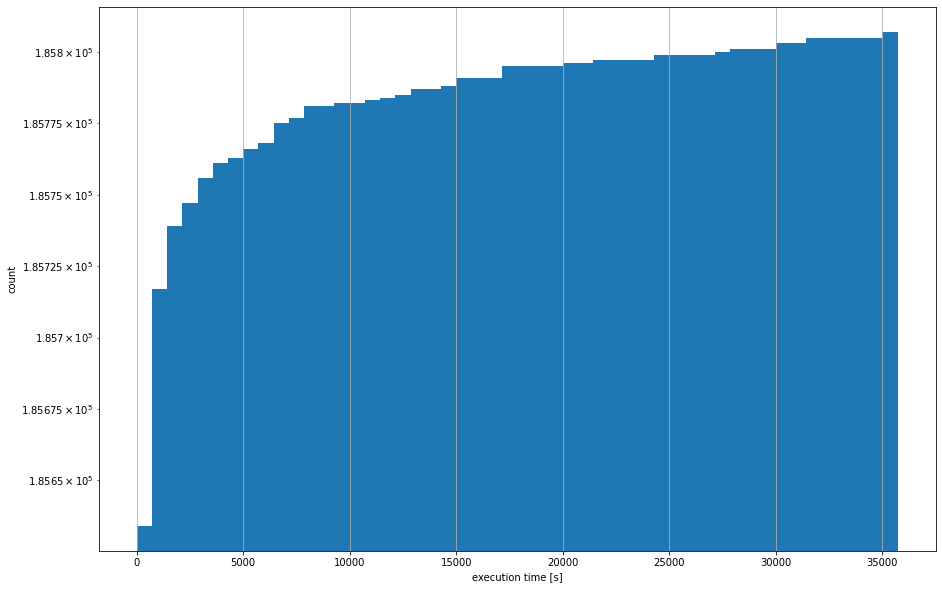

In [106]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
seconds = df.execTimeMs / 1000
# seconds = seconds.loc[seconds < 1000]
seconds.hist(ax=ax, bins=50, cumulative=True)
ax.set_yscale('log')
ax.set_ylabel('count')
ax.set_xlabel('execution time [s]')